In [1]:
from heuristics_constructive import Random

In [2]:
from paintshop import PaintShop, Source


paintshops = [PaintShop(Source.SEPTEMBER), PaintShop(Source.NOVEMBER)]

def get_solution_space_cost_sample(n: int) -> list[float]:
    return [Random.get_schedule().cost for s in range(n)]

In [3]:
import os
import pickle
import uuid

n = 10000

cache_folder = os.path.join('cache', 'solution_space_cost_samples')
if not os.path.exists(cache_folder):
    os.mkdir(cache_folder)
    
cached_sample_path = os.path.join(cache_folder, f'{uuid.uuid4()}.pickle')

sample = get_solution_space_cost_sample(n)

# Save sample
with open(cached_sample_path, 'wb') as outp:  # Overwrites any existing file.
    pickle.dump(sample, outp, pickle.HIGHEST_PROTOCOL)
print(f"Saved: '{cached_sample_path}'")

Saved: 'cache\solution_space_cost_samples\1b0725d3-cb64-4205-977d-369f6d17fe35.pickle'


In [23]:
# Load samples
sample = []
files = os.listdir(cache_folder)
for file in files:
    with open(os.path.join(cache_folder, file),'rb') as file:
        sample += pickle.load(file)
        # print(f"Loaded {file.name}")
print(f"Loaded {len(sample)} samples from {len(files)} files.")

Loaded 20000 samples from 2 files.


In [20]:
sample

[2743.0333333333338,
 3760.9111111111106,
 2754.3888888888887,
 4429.333333333334,
 3431.311111111112,
 3720.3111111111107,
 3431.977777777777,
 3831.5111111111105,
 4620.9444444444425,
 5056.944444444445,
 8089.1,
 9285.0,
 5378.322222222223,
 3165.0444444444447,
 8090.5,
 5659.099999999999,
 8995.166666666666,
 8767.6,
 5030.088888888889,
 4738.7444444444445,
 9162.999999999998,
 5043.833333333334,
 3186.2888888888892,
 3303.9555555555557,
 9994.355555555556,
 3363.144444444444,
 6939.166666666666,
 6124.266666666666,
 7598.4,
 6097.055555555556,
 5485.000000000002,
 8104.88888888889,
 5069.977777777778,
 4469.5,
 6265.055555555555,
 5282.133333333332,
 4610.8,
 5744.611111111111,
 3503.688888888889,
 7406.377777777778,
 8302.888888888889,
 3762.644444444445,
 8495.166666666668,
 7707.333333333334,
 8173.200000000001,
 7420.6,
 7559.088888888889,
 4551.7222222222235,
 1955.4444444444443,
 4224.888888888887,
 5530.100000000002,
 4479.255555555555,
 6331.222222222222,
 4834.03333333333

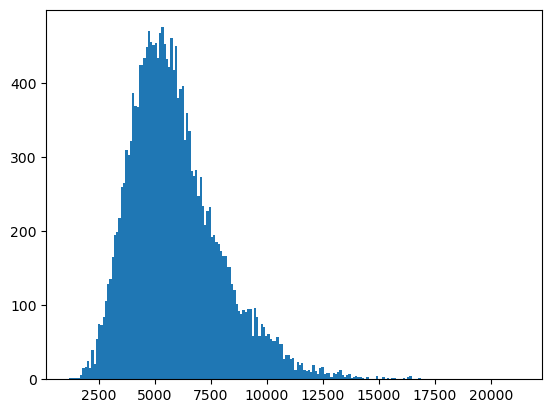

In [21]:
import matplotlib.pyplot as plt

plt.hist(sample, bins = 200)
plt.show()

# Looks like an f-distribution!
### Lets fit one!

In [6]:
import numpy as np
import scipy.stats as stats

shape_a, shape_b, loc, scale = stats.f.fit(sample)
print(shape_a, shape_b, loc, scale)

c:\Users\SJGMC\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


30.246497904784952 44.31170142332428 -19.262006003776627 5659.944972530748


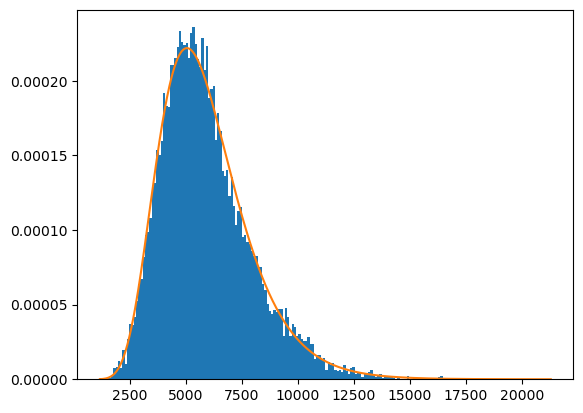

In [7]:
xs = np.linspace(min(sample), max(sample), 1000)
plt.hist(sample, bins = 200, density = True)
plt.plot(xs, stats.f.pdf(xs, shape_a, shape_b, loc = loc, scale = scale))
plt.show()

In [8]:
from distfit import distfit

# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(np.array(sample))

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.0 sec] [RSS: 4.9458e-08] [loc=5908.400 scale=2047.755]
[distfit] >INFO> [expon     ] [0.0 sec] [RSS: 4.99306e-07] [loc=1151.611 scale=4756.788]
[distfit] >INFO> [pareto    ] [0.03 sec] [RSS: 4.99306e-07] [loc=-1099511626624.388 scale=1099511627776.000]
[distfit] >INFO> [dweibull  ] [0.27 sec] [RSS: 3.4131e-08] [loc=5691.359 scale=1639.204]
[distfit] >INFO> [t         ] [1.57 sec] [RSS: 4.94714e-08] [loc=5888.281 scale=2041.614]
[distfit] >INFO> [genextreme] [1.65 sec] [RSS: 3.37531e-07] [loc=1742.238 scale=4057.692]
[distfit] >INFO> [gamma     ] [0.33 sec] [RSS: 4.87751e-09] [loc=938.219 scale=813.777]
[distfit] >INFO> [lognorm   ] [0.80 sec] [RSS: 1.01347e-06] [loc=1151.611 scale=1.554]
[distfit] >INFO> [beta      ] [0.67 sec] [RSS: 5.3181e-09] [loc=1022.180 scale=1417181715.657]
[distfit] >INFO> [uniform   ] [0.0 sec] [RSS: 5.69842e-07] [loc=1151.611 scale=20136.889]
[distfit] >INFO> [loggamma  ] [0.35 s

{'model': {'name': 'gamma',
  'score': 4.877512000367458e-09,
  'loc': 938.218682691685,
  'scale': 813.7767827309669,
  'arg': (6.107333310630041,),
  'params': (6.107333310630041, 938.218682691685, 813.7767827309669),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x235f7a82b50>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 3122.3111853833702,
  'CII_max_alpha': 9610.659122612626},
 'summary':           name     score                   loc                 scale  \
 0        gamma       0.0            938.218683            813.776783   
 1         beta       0.0           1022.180268     1417181715.656988   
 2     dweibull       0.0           5691.359352           1639.203818   
 3         norm       0.0           5908.399606           2047.754516   
 4            t       0.0           5888.281494           2041.613719   
 5     loggamma       0.0        -525095.793279          74132.589082   
 6   genextreme       

[distfit] >INFO> Ploting Summary.


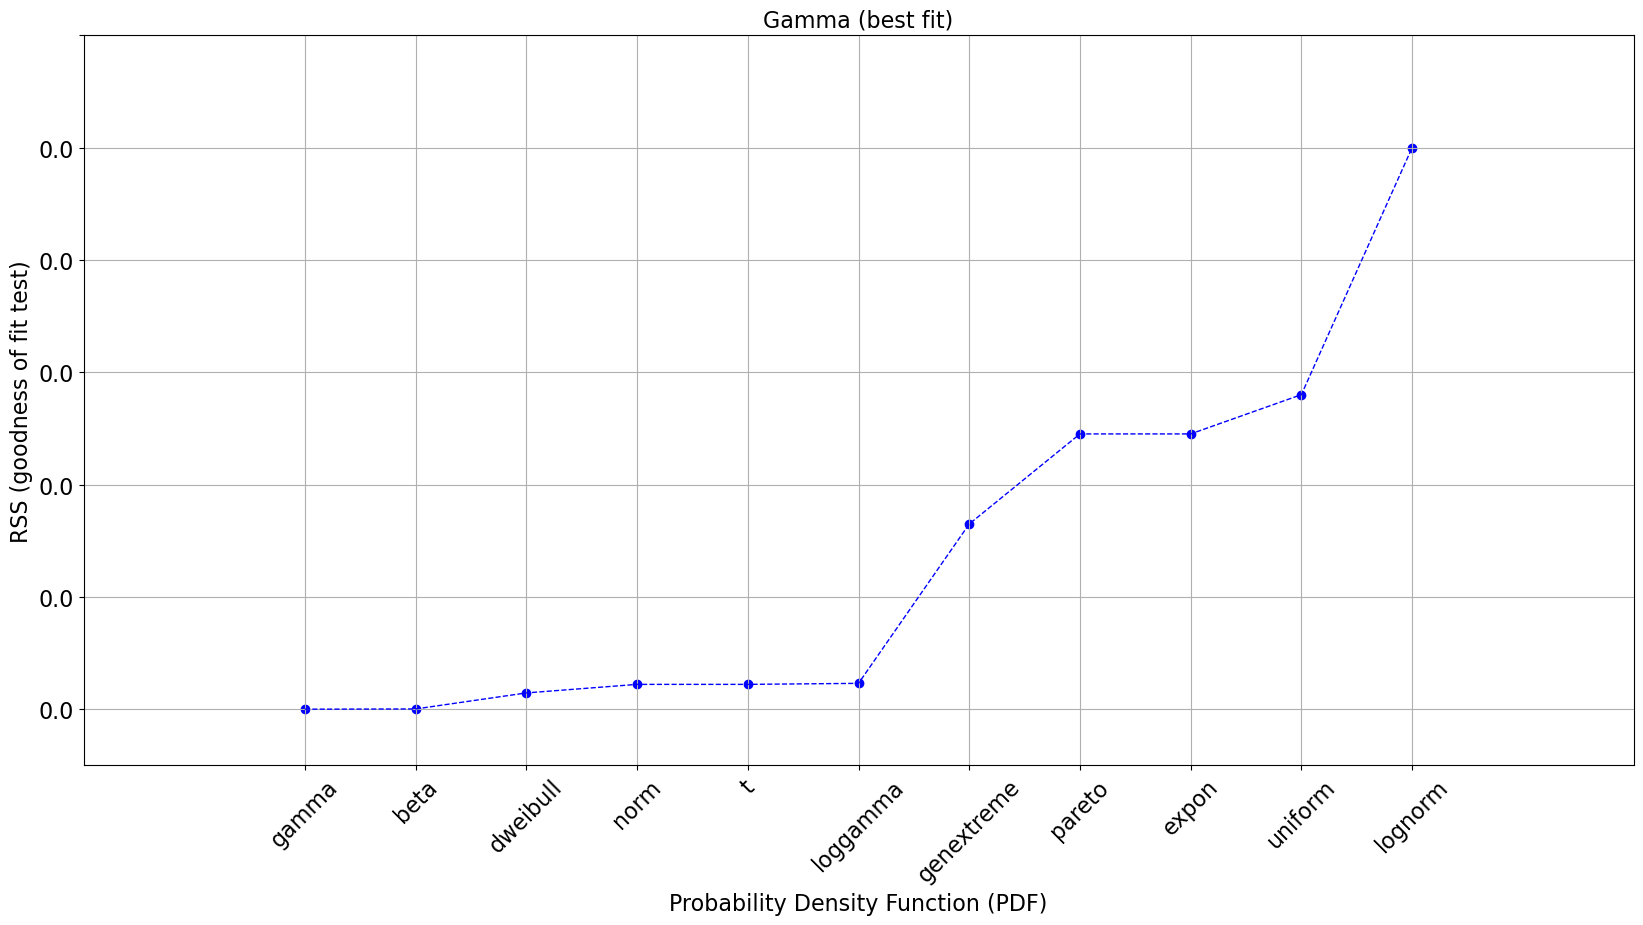

In [9]:
dist.plot_summary()
plt.show()

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Gamma(loc:938.218683, scale:813.776783)


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ngamma(a=6.10733, loc=938.219, scale=813.777)'}, xlabel='Values', ylabel='Frequency'>)

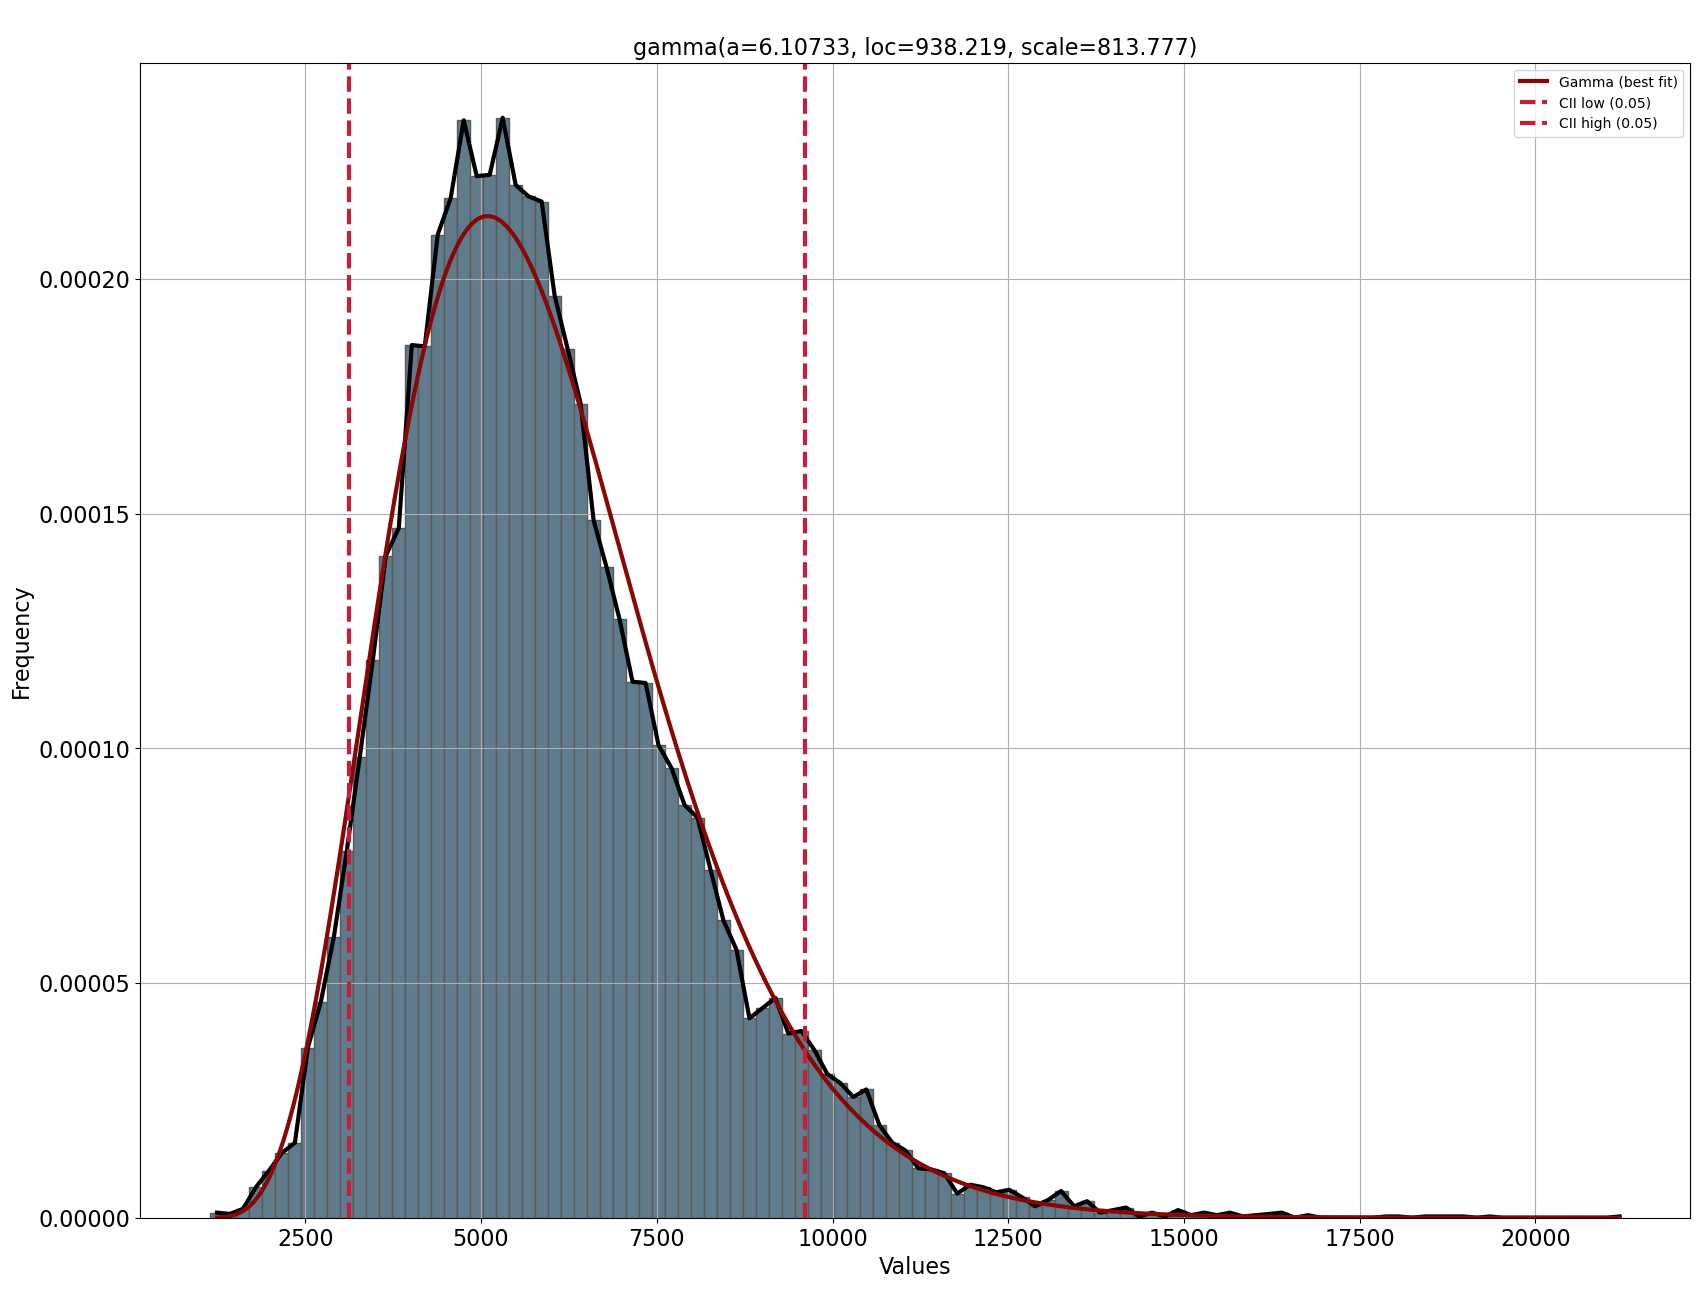

In [10]:
dist.plot()

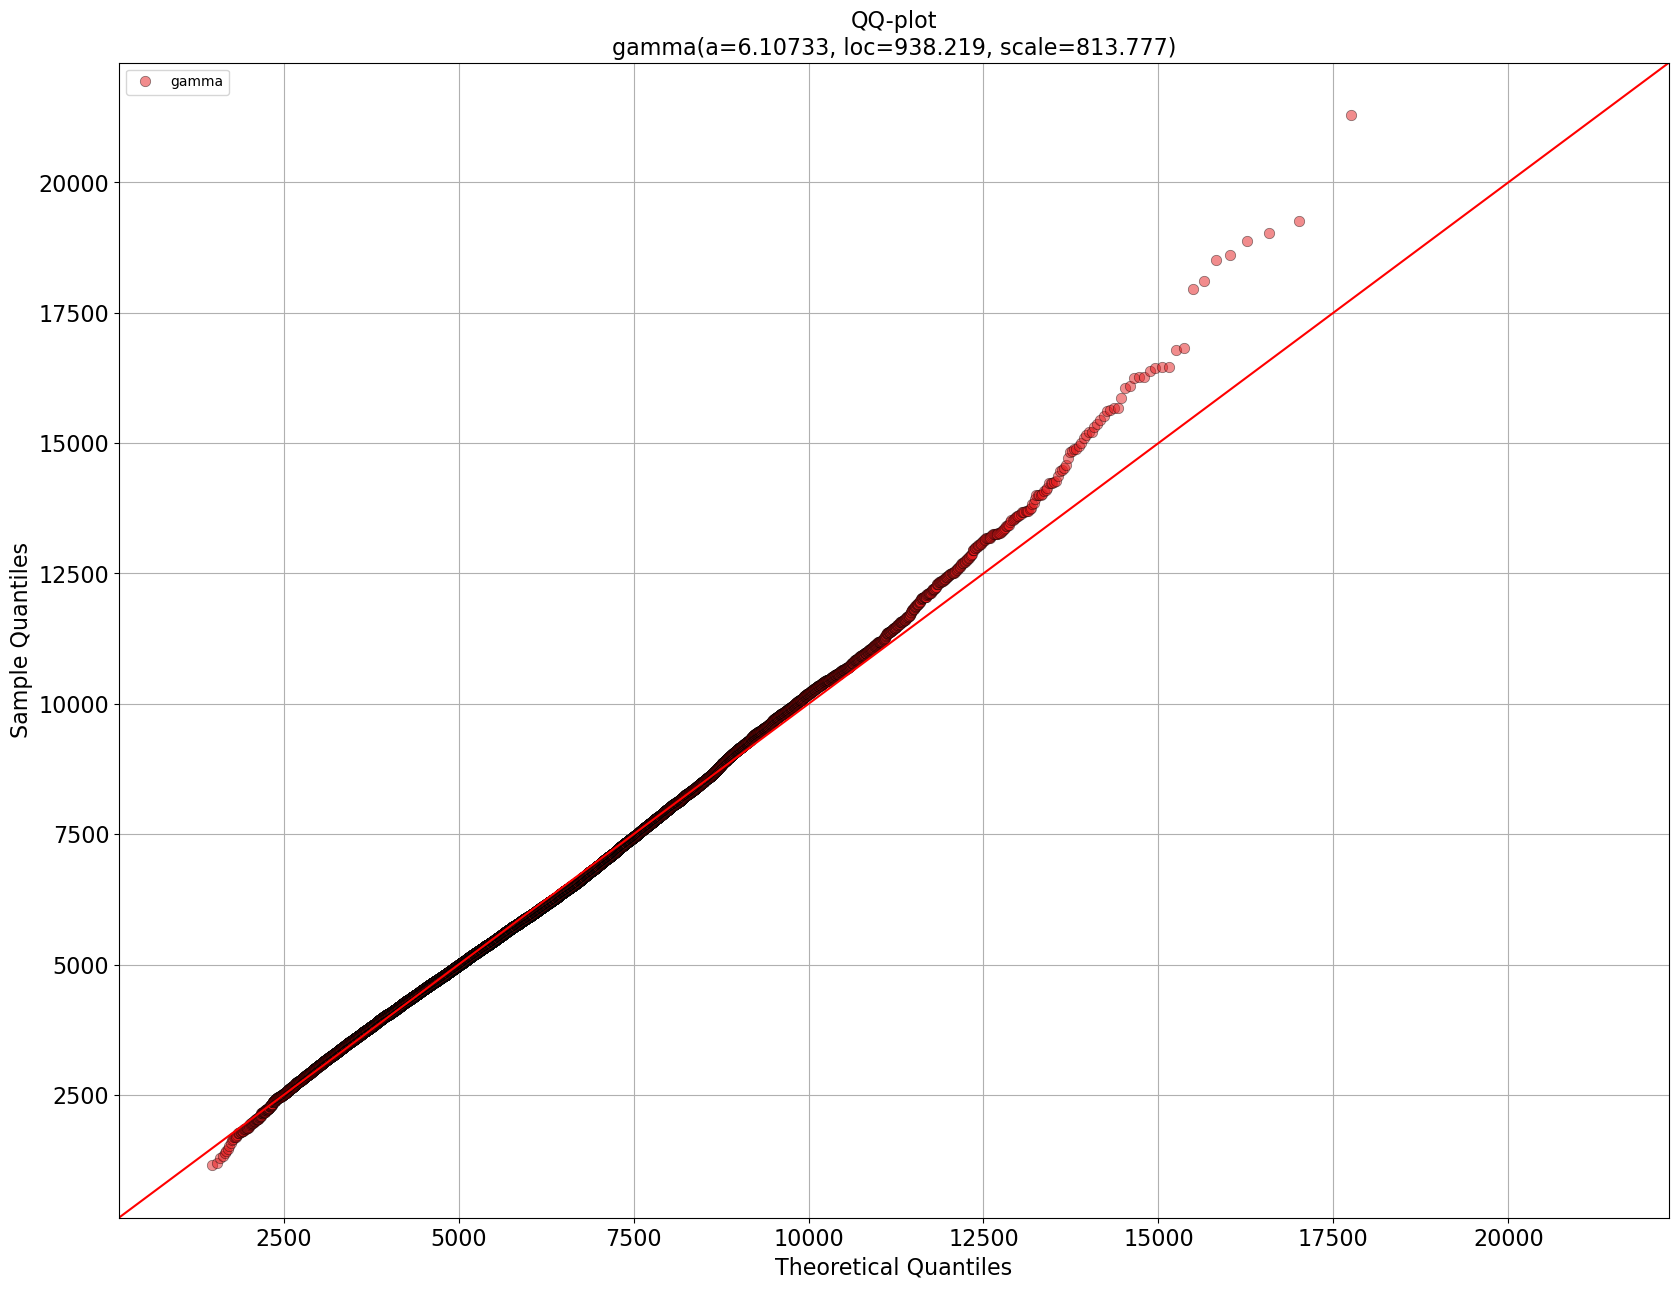

In [11]:
dist.qqplot(np.array(sample))
plt.show()

In [12]:
results = dist.predict(np.array([7000]))
print(results)

[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


{'y': array([7000]), 'y_proba': array([0.26087546]), 'y_pred': array(['none'], dtype='<U4'), 'P': array([0.26087546]), 'y_bool': array([False]), 'df':         y   y_proba y_pred         P
0  7000.0  0.260875   none  0.260875}


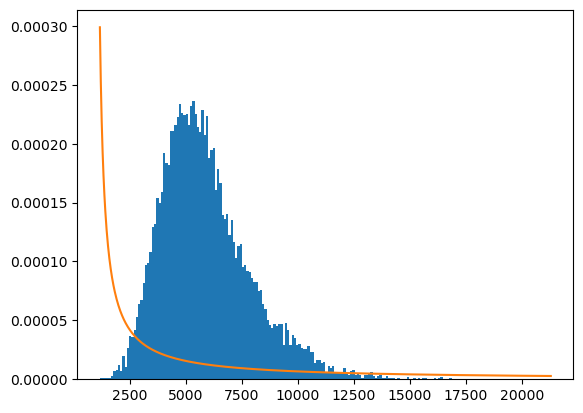

In [13]:
model = stats.lognorm(*dist.model['params'])
plt.hist(sample, bins = 200, density = True)
plt.plot(xs, model.pdf(xs))

In [14]:
# Chance of getting a solution under 100:
model.cdf(100)

0.0

In [15]:
# Chance of getting a solution with 0 cost:
model.cdf(0)

0.0

In [16]:
from paintshop import PaintShop
PS = PaintShop()

In [17]:
# Number of estimated solutions with 0 cost:
PS.solution_space_size * model.cdf(0)

0.0